# INTRODUCTION

Melbourne Housing Project Using this data create a model (Linear Regression) to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer. The project should follow the guideline as:

1. Examine and explore data (visualization, interactions among features)
2. Apply the model for prediction with holdout and cross validation
3. Using PCA, apply the model with holdout and cross validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)
7. Include conclusions for summary

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import os

In [45]:
PathFile = os.getcwd()+'\Melbourne_housing_FULL.csv'

In [46]:
data = pd.read_csv(PathFile)

In [47]:
pd.set_option('display.max_columns', None) # display all columns
print(data.head(5))

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   

Kiểm tra data ta thấy những columns có giá trị là categories

In [48]:
print(data.keys())

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [49]:
print(data.shape)

(34857, 21)


Data có 34857 Rows và 21 columns

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [51]:
pd.isnull(data).sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Dự trên kết quả kiểm tra columns có giá trị Null ta thấy. 
- Cột BuildingArea (21115 rows), YearBuilt (19306 rows) có giá trị Null nhiều nhất ==> Kiểm tra tương quan với Price và xem xét xem có thể loại bỏ các cột đó?
- Cột Price có 7610 rows có giá trị Null.

Phân tích những cột dtypes là object

In [52]:
len(data.Suburb.unique())

351

In [53]:
len(data.Address.unique())

34009

In [54]:
len(data.Type.unique())

3

In [55]:
len(data.Method.unique())

9

In [56]:
len(data.SellerG.unique())

388

In [57]:
len(data.CouncilArea.unique())

34

In [58]:
len(data.Regionname.unique())

9

Từ data cho thấy ta có thể áp dụng one-hotend-code cho những cột Type, method, Regionname

In [59]:
dummies = pd.get_dummies(data[['Type', 'Method', 'Regionname']])
data = pd.concat([data, dummies], axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [60]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.00000,34857.000000,34857.000000,34857.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306,0.687954,0.102705,0.209341,0.139140,0.008836,0.566429,0.006484,0.037783,0.146169,0.001033,0.089164,0.004963,0.125570,0.006541,0.274177,0.005824,0.04989,0.339559,0.195054,0.003299
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313,0.463335,0.303578,0.406844,0.346097,0.093586,0.495575,0.080261,0.190674,0.353280,0.032121,0.284985,0.070275,0.331369,0.080613,0.446105,0.076092,0.21772,0.473566,0.396248,0.057345
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


a. Quan sát bảng dữ liệu ta thấy có điểm bất thường ở cột YearBuilt có giá trị min = 1196 và giá trị Max = 2106.
- Nghi ngờ giá trị này khi nhập dữ liệu bị sai.
- Dựa trên suy đoán năm 1196 sẽ thay đổi thành 1996, năm 2106 sẽ thay đổi thành 2016.
b. Cột Bathroom và Car số lượng <=2 chiếm 75% vậy những cột có giá trị Null ta có thể thay thế null = mean

In [61]:
data['YearBuilt'].replace(1196, 1996, inplace=True)

In [62]:
data['YearBuilt'].replace(2106, 2016, inplace=True)

In [63]:
data['Bathroom'].replace(np.NaN,data.Bathroom.mean(),inplace=True)

In [64]:
data['Car'].replace(np.NaN,data.Car.mean(),inplace=True)

In [65]:
data['Bedroom2'].replace(np.NaN,data.Bedroom2.mean(),inplace=True)

In [66]:
pd.isnull(data).sum()

Suburb                                       0
Address                                      0
Rooms                                        0
Type                                         0
Price                                     7610
Method                                       0
SellerG                                      0
Date                                         0
Distance                                     1
Postcode                                     1
Bedroom2                                     0
Bathroom                                     0
Car                                          0
Landsize                                 11810
BuildingArea                             21115
YearBuilt                                19306
CouncilArea                                  3
Lattitude                                 7976
Longtitude                                7976
Regionname                                   3
Propertycount                                3
Type_h       

In [67]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
count,34857.000000,2.724700e+04,34856.000000,34856.000000,34857.000000,34857.000000,34857.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.00000,34857.000000,34857.000000,34857.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.335541,-37.810634,145.001851,7572.888306,0.687954,0.102705,0.209341,0.139140,0.008836,0.566429,0.006484,0.037783,0.146169,0.001033,0.089164,0.004963,0.125570,0.006541,0.274177,0.005824,0.04989,0.339559,0.195054,0.003299
std,0.969933,6.414671e+05,6.788892,109.023903,0.857337,0.633013,0.875119,3398.841946,401.26706,36.800614,0.090279,0.120169,4428.090313,0.463335,0.303578,0.406844,0.346097,0.093586,0.495575,0.080261,0.190674,0.353280,0.032121,0.284985,0.070275,0.331369,0.080613,0.446105,0.076092,0.21772,0.473566,0.396248,0.057345
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1800.000000,-38.190430,144.423790,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,3.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,1.624798,1.728845,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,3.084647,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2019.000000,-37.390200,145.526350,21650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


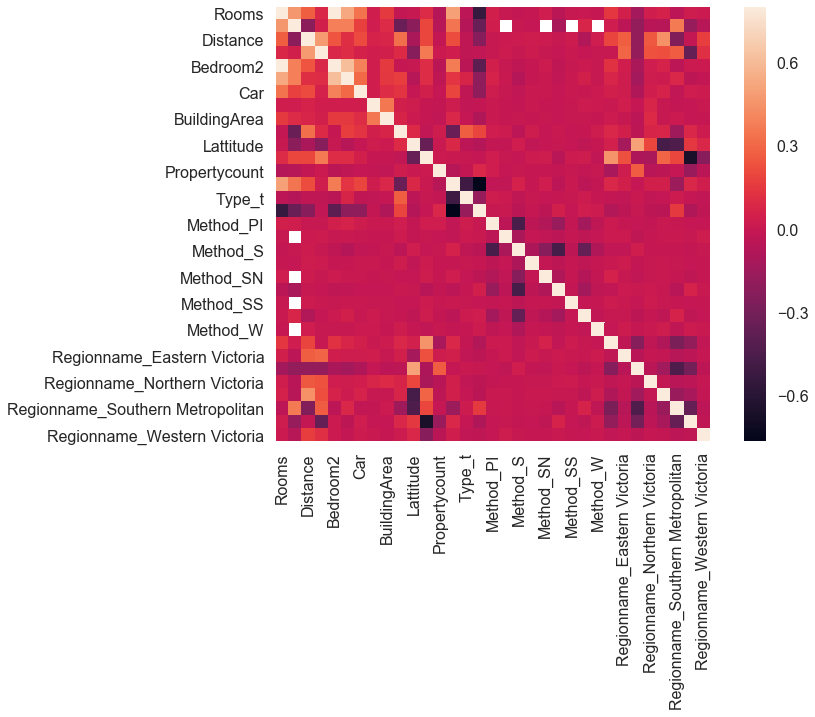

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
Rooms,1.000000,0.465238,0.271511,0.085890,0.819099,0.529191,0.337780,0.037402,0.156229,-0.013227,0.004872,0.103235,-0.071677,0.499496,-0.041022,-0.538242,0.046885,-0.000174,-0.016731,-0.005531,0.034152,-0.044124,0.005418,0.006499,-0.006046,0.142932,0.042537,-0.131972,0.037980,0.059922,-0.042164,0.028452,0.015698
Price,0.465238,1.000000,-0.211384,0.044950,0.380414,0.379456,0.177714,0.032748,0.100754,-0.339192,-0.215607,0.197874,-0.059017,0.347299,-0.063657,-0.346388,0.038881,NaN,0.002691,-0.008840,NaN,-0.104156,NaN,0.074224,NaN,0.033720,-0.040992,-0.187367,-0.052621,-0.061181,0.363694,-0.172605,-0.057248
Distance,0.271511,-0.211384,1.000000,0.481566,0.239091,0.111939,0.211768,0.060862,0.076301,0.328289,-0.100417,0.200946,-0.018140,0.216365,-0.025506,-0.227375,0.001755,0.016886,0.018869,0.027770,0.020833,0.002905,0.018241,-0.075585,0.031150,0.192635,0.272955,-0.186781,0.252678,0.439851,-0.253115,-0.018134,0.167194
Postcode,0.085890,0.044950,0.481566,1.000000,0.080398,0.108110,0.060746,0.040664,0.042437,0.091496,-0.231027,0.362895,0.017108,0.036568,-0.029533,-0.019608,0.000184,0.020259,0.002873,0.019311,0.001529,-0.009344,0.010984,-0.008978,0.004011,0.002219,0.292904,-0.182972,0.234873,0.224564,0.263191,-0.355355,0.117008
Bedroom2,0.819099,0.380414,0.239091,0.080398,1.000000,0.614737,0.385459,0.037019,0.154157,-0.002318,0.003434,0.105764,-0.045785,0.371900,-0.045375,-0.389682,0.046279,0.001293,-0.030830,-0.000374,0.020359,-0.026198,0.000568,0.015401,0.001943,0.124905,0.036946,-0.108668,0.035778,0.063553,-0.038847,0.012627,0.016454
Bathroom,0.529191,0.379456,0.111939,0.108110,0.614737,1.000000,0.305530,0.036333,0.147558,0.169009,-0.058938,0.106119,-0.028168,0.136173,0.067184,-0.205213,0.064981,0.005773,-0.061940,-0.005062,0.007925,-0.021903,0.006887,0.048221,0.004773,0.076703,0.025251,-0.131748,0.028536,0.020014,0.082093,-0.033603,-0.013419
Car,0.337780,0.177714,0.211768,0.060746,0.385459,0.305530,1.000000,0.037252,0.104340,0.130626,-0.008946,0.046627,-0.008171,0.194412,-0.026424,-0.201689,0.026718,0.004397,-0.018954,0.006090,0.007183,-0.010717,0.006452,0.002064,0.012333,0.047496,0.028127,-0.084114,0.036780,0.063721,-0.023096,0.031797,0.020647
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037252,1.000000,0.354530,0.045568,0.025318,-0.002582,-0.018195,0.027337,-0.023793,-0.014852,0.009170,-0.000867,-0.013175,0.008020,-0.002819,-0.008580,0.002001,0.019428,0.013216,0.010296,0.040157,-0.010713,0.076598,0.003763,-0.012566,-0.007263,0.008948
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104340,0.354530,1.000000,0.068043,0.017155,-0.002143,-0.024523,0.079095,-0.009368,-0.085439,0.007216,-0.001902,0.001427,-0.002422,0.002556,-0.011303,0.003769,0.003155,-0.002498,0.021191,0.002950,-0.042125,0.095965,0.005204,0.013927,-0.010061,-0.004833
YearBuilt,-0.013227,-0.339192,0.328289,0.091496,-0.002318,0.169009,0.130626,0.045568,0.068043,1.000000,0.091921,-0.021183,0.024752,-0.337633,0.272857,0.191635,0.034802,0.018790,-0.038064,0.025030,-0.008882,0.009978,-0.010364,-0.001598,0.028241,0.081565,0.046262,-0.031905,0.067288,0.075651,-0.152702,0.082556,0.023517


In [68]:
#Xét mối tương quan giữa các giá trị
fig, ax = plt.subplots(figsize=(12, 8))
corrmat = data.corr()
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()
corrmat

- Price tương quan cao Rooms, Bedroom2, Bathroom, BuildingArea. Price tương quan nghịch Distance, YearBuit, Lattitude. 
- Price tương quan thấp Propertycount, Postcode, Landsize.

- Dựa vào kết quả cho ta thấy dữ liệu sãy ra trường hợp đa công tuyến (Muticollinearty) Rooms tương quan rất cao với Bedroom2 và tương quan cao Bathroom, BuildingArea. BuildingArea tương quan cao Rooms, Bedroom2, Bathroom.
- Landsize, Postcode, Propertycount không có mối tương quan với Price. Ta sẽ tiến hành drop các cột.
- BuildingArea và YearBuit tuy có mối tương quan với Price nhưng Null value quá nhiều ta cũng sẽ tiến hành Drop.


In [69]:
print(data.shape)
print(data.keys())

(34857, 41)
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Type_h', 'Type_t',
       'Type_u', 'Method_PI', 'Method_PN', 'Method_S', 'Method_SA',
       'Method_SN', 'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')


In [70]:
data.drop(columns=['Suburb','Address','Landsize','Postcode','Propertycount','BuildingArea','YearBuilt','Lattitude','Longtitude','SellerG', 'Date'], inplace=True)

In [71]:
print(data.shape)

(34857, 30)


In [72]:
pd.isnull(data[data['Price'].isnull()]).sum()

Rooms                                       0
Type                                        0
Price                                    7610
Method                                      0
Distance                                    0
Bedroom2                                    0
Bathroom                                    0
Car                                         0
CouncilArea                                 0
Regionname                                  0
Type_h                                      0
Type_t                                      0
Type_u                                      0
Method_PI                                   0
Method_PN                                   0
Method_S                                    0
Method_SA                                   0
Method_SN                                   0
Method_SP                                   0
Method_SS                                   0
Method_VB                                   0
Method_W                          

Kết quả sau khi xử lý Cột Price còn 7610 Null value.
- Tiến hành tách làm 2 bảng dữ liệu.
    Bảng 1. dữ liệu Price không có giá trị Null dùng để train và test.
    Bảng 2. dữ liệu Price chứa value Null.

In [73]:
dataNullValuePrice = data[np.isnan(data.Price)]
dataNullValuePrice.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,h,NaN,SS,2.5,2.0,1.0,1.0,Yarra City Council,Northern Metropolitan,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,3,u,NaN,VB,2.5,3.0,2.0,1.0,Yarra City Council,Northern Metropolitan,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7,4,h,NaN,SN,2.5,3.0,2.0,2.0,Yarra City Council,Northern Metropolitan,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,2,h,NaN,S,2.5,4.0,1.0,2.0,Yarra City Council,Northern Metropolitan,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,2,h,NaN,S,2.5,3.0,2.0,1.0,Yarra City Council,Northern Metropolitan,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [74]:
print(dataNullValuePrice.shape)

(7610, 30)


In [75]:
#data = np.any(np.isnan(data.Price))
#data = np.all(np.isfinite(data['Price']))
data = data[np.isfinite(data['Price'])]
print(data.shape)

(27247, 30)


In [76]:
data = data.select_dtypes(exclude=['object'])

In [77]:
# Những cột nào có giá trị Null ta sẽ thay thế bằng giá trị mean
data =data.fillna(data.mean())

In [78]:
print(data.shape)

(27247, 26)


# LinearRegession with Holdout

In [79]:
print(data.keys())

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Type_h',
       'Type_t', 'Type_u', 'Method_PI', 'Method_PN', 'Method_S', 'Method_SA',
       'Method_SN', 'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object')


In [80]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 26 columns):
Rooms                                    27247 non-null int64
Price                                    27247 non-null float64
Distance                                 27247 non-null float64
Bedroom2                                 27247 non-null float64
Bathroom                                 27247 non-null float64
Car                                      27247 non-null float64
Type_h                                   27247 non-null uint8
Type_t                                   27247 non-null uint8
Type_u                                   27247 non-null uint8
Method_PI                                27247 non-null uint8
Method_PN                                27247 non-null uint8
Method_S                                 27247 non-null uint8
Method_SA                                27247 non-null uint8
Method_SN                                27247 non-null uint8
Method_SP    

In [81]:
y_train= data['Price']

In [82]:
print(y_train.head())

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64


In [83]:
print(y_train.shape)

(27247,)


In [84]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 26 columns):
Rooms                                    27247 non-null int64
Price                                    27247 non-null float64
Distance                                 27247 non-null float64
Bedroom2                                 27247 non-null float64
Bathroom                                 27247 non-null float64
Car                                      27247 non-null float64
Type_h                                   27247 non-null uint8
Type_t                                   27247 non-null uint8
Type_u                                   27247 non-null uint8
Method_PI                                27247 non-null uint8
Method_PN                                27247 non-null uint8
Method_S                                 27247 non-null uint8
Method_SA                                27247 non-null uint8
Method_SN                                27247 non-null uint8
Method_SP    

In [85]:
#x_train = data.drop(columns=['Price','Type','Method','Regionname','CouncilArea'], inplace=True)
#x_train =data[['Rooms','Distance','Bedroom2','Bathroom','Car','Type_h','Type_t','Type_u','Method_PI','Method_PN','Method_S','Method_SA',
#              'Method_SN','Method_SP','Method_SS','Method_VB','Method_W','Regionname_Eastern Metropolitan','Regionname_Eastern Victoria',
#              'Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan',
#              'Regionname_Western Metropolitan','Regionname_Western Victoria']]

In [86]:
x_train = data.drop(['Price'],axis=1)

In [87]:
print(x_train.shape)

(27247, 25)


In [88]:
#x_train = np.isnan(x_train)
#print(x_train.shape)

In [89]:
x_trainData = x_train

# Linear regression với holdout

In [90]:
LinearReg = linear_model.LinearRegression()

In [91]:
# Sử dụng split dữ liệu (train trên 80% dữ liệu, 20% còn lại làm dữ liệu test)
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=4)

In [92]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797 entries, 14747 to 22473
Data columns (total 25 columns):
Rooms                                    21797 non-null int64
Distance                                 21797 non-null float64
Bedroom2                                 21797 non-null float64
Bathroom                                 21797 non-null float64
Car                                      21797 non-null float64
Type_h                                   21797 non-null uint8
Type_t                                   21797 non-null uint8
Type_u                                   21797 non-null uint8
Method_PI                                21797 non-null uint8
Method_PN                                21797 non-null uint8
Method_S                                 21797 non-null uint8
Method_SA                                21797 non-null uint8
Method_SN                                21797 non-null uint8
Method_SP                                21797 non-null uint8
Method_SS  

In [93]:
print(y_train.shape)

(21797,)


In [94]:
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5450 entries, 34436 to 19033
Data columns (total 25 columns):
Rooms                                    5450 non-null int64
Distance                                 5450 non-null float64
Bedroom2                                 5450 non-null float64
Bathroom                                 5450 non-null float64
Car                                      5450 non-null float64
Type_h                                   5450 non-null uint8
Type_t                                   5450 non-null uint8
Type_u                                   5450 non-null uint8
Method_PI                                5450 non-null uint8
Method_PN                                5450 non-null uint8
Method_S                                 5450 non-null uint8
Method_SA                                5450 non-null uint8
Method_SN                                5450 non-null uint8
Method_SP                                5450 non-null uint8
Method_SS                 

In [95]:
print(y_test.shape)

(5450,)


In [96]:
#Bắt đầu chạy hồi quy tuyến tín (LinearRegression)
model = LinearReg.fit(x_train,y_train)

In [97]:
score=model.score(x_train,y_train)
print(score)

0.5616398392895415


In [98]:
LinearReg.coef_

array([ 2.37637127e+05, -4.25361411e+04, -4.95888233e+04,  1.90836388e+05,
        3.83560456e+04,  2.62019111e+05, -3.38589385e+04, -2.28160173e+05,
       -3.74322018e+04, -9.60426405e-10,  2.18195957e+04,  1.96122961e+04,
        2.87400326e-10, -8.17733090e+03,  1.30967237e-10,  4.17764097e+03,
       -3.66981112e-09,  6.10254986e+05,  9.14049699e+05,  3.51575299e+05,
        7.93534383e+05,  8.25109831e+05,  8.75951292e+05,  2.76849461e+05,
        5.95958040e+05])

In [99]:
#Ket qua du doan tren tap test
KetQuaDuDoan=model.predict(x_test)

In [100]:
##Sai so trung binh tren tap train
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, model.predict(x_train)))

182106483603.85678


In [101]:
##Sai so trung binh tren tap test
print(mean_squared_error(y_test, model.predict(x_test)))

168593723470.5271


In [102]:
score1=model.score(x_test, y_test)
print(score1)

0.5738170164329708


Hiển thị đồ thị dự đoán trên tập Train

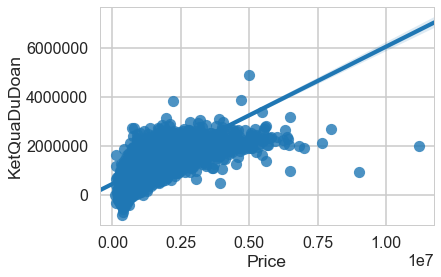

In [103]:
sns.regplot(y_train, model.predict(x_train))
plt.xlabel("Price")
plt.ylabel("KetQuaDuDoan")
plt.show()

Hiển thị đồ thị dự đoán trên tập Test

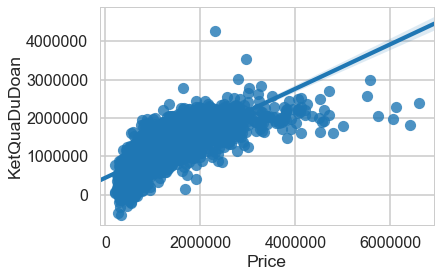

In [104]:
sns.regplot(y_test, KetQuaDuDoan)
plt.xlabel("Price")
plt.ylabel("KetQuaDuDoan")
plt.show()

# Linear regression với cross validation

In [105]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [106]:
LinearRegcv = linear_model.LinearRegression()

In [107]:
y_traincv= data['Price']

In [108]:
KetQuaDuDoanCV = cross_val_predict(LinearRegcv, x_trainData, y_traincv, cv=10)

In [109]:
scores = cross_val_score(LinearRegcv, x_trainData, y_traincv, cv=10)
print(scores)

[0.5896397  0.61286907 0.48609641 0.55861931 0.54759252 0.52260272
 0.56911416 0.52489001 0.51561184 0.58868328]


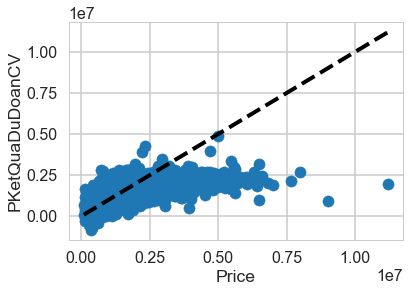

In [110]:
fig, ax = plt.subplots()
ax.scatter(y_traincv, KetQuaDuDoanCV)
ax.plot([y_traincv.min(), y_traincv.max()], [y_traincv.min(), y_traincv.max()], 'k--', lw=4)
ax.set_xlabel('Price')
ax.set_ylabel('PKetQuaDuDoanCV')
plt.show()

In [111]:
#from sklearn.metrics import mean_squared_error
#print(mean_squared_error(y_traincv, LinearRegcv.predict(x_trainData)))

# PCA với holdout

In [112]:
from sklearn.decomposition import PCA

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
Y = data.Price
X = data.select_dtypes(exclude=['object'])
X = X.drop(['Price'],axis=1)
X = X.fillna(X.mean())
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

In [115]:
# Train Regression Model with PCA
pca = PCA()
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
explained_variance = pca.explained_variance_ratio_

modelpca = LinearRegression()
modelpca.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
modelpca.coef_

array([-1.96595510e+04,  2.72376996e+05, -6.81424183e+04,  9.75352209e+04,
       -2.04579826e+05, -2.82817516e+05, -3.35717139e+05, -2.95704881e+05,
       -3.71759212e+04,  3.15944667e+04, -1.46283940e+05, -4.76855292e+04,
       -6.44743884e+03,  2.48795344e+05, -1.15962782e+04,  2.86594896e+05,
        1.41047427e+05, -9.44427404e+04, -1.43571544e+06, -2.17383065e-21,
       -1.00172658e-23, -2.90029320e-25, -6.10045702e-24,  1.81915111e-24,
        1.46854346e-26])

In [118]:
modelpca.intercept_

1051091.0535853559

In [119]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytrain, modelpca.predict(Xtrain))

178248704369.70178

In [120]:
mean_squared_error(ytest, modelpca.predict(Xtest))

184047964849.24722

Kiểm chứng trên tập Train

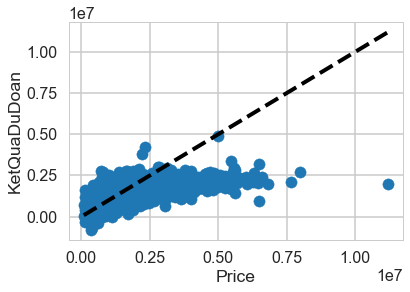

In [121]:
fig, ax = plt.subplots()
ax.scatter(ytrain, modelpca.predict(Xtrain))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Price')
ax.set_ylabel('KetQuaDuDoan')
plt.show()

Kiểm chứng trên tập Test

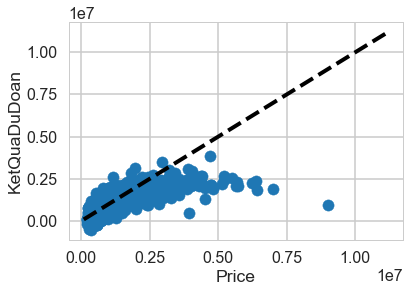

In [122]:
fig, ax = plt.subplots()
ax.scatter(ytest, modelpca.predict(Xtest))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Price')
ax.set_ylabel('KetQuaDuDoan')
plt.show()

# PCA với cross validation

In [123]:
# Train Regression Model with PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
modelpcaCV = LinearRegression()

num_folds = 10
subset_size = int(len(Y)/num_folds)
mse=[]
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle = False, random_state = 0) #define number of splits
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    # Train Regression Model with PCA
    from sklearn.linear_model import LinearRegression
    modelloop = LinearRegression()
    modelloop.fit(X_train, y_train)

Kiểm chứng trên tập Train

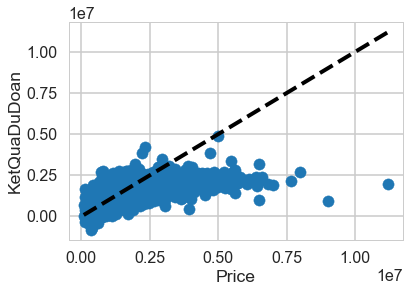

In [124]:
fig, ax = plt.subplots()
ax.scatter(y_train, modelloop.predict(X_train))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Price')
ax.set_ylabel('KetQuaDuDoan')
plt.show()

Kiểm chứng trên tập Test

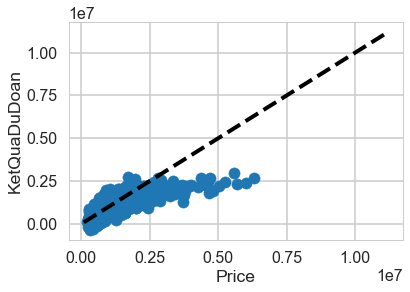

In [125]:
fig, ax = plt.subplots()
ax.scatter(y_test, modelloop.predict(X_test))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Price')
ax.set_ylabel('KetQuaDuDoan')
plt.show()

In [126]:
mean_squared_error(y_test, modelloop.predict(X_test))


166602814326.98273

# Nhận xét dữ liệu sau khi training bằng các mô hình

Dựa trên kết quả ta thấy Train bằng PCA có kết quả tốt hơn.
    - Do trong dữ liệu có nhiều feature tương quan cao với nhau. (Khi sãy ra trường hợp đa cộng tuyến làm tăng sai số).